analise dscriva. EDA,. inferencia, cluster, eda, feature engenering, modelagem comum, deep learning, avaliaçao, over/undersampling, avaliaçao, deploy 

In [35]:
#importaçoes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from scipy.stats import ttest_ind


In [2]:
#dataset 
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
df = df.set_index('TransactionDate')

In [4]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 2023-04-11 16:29:14 to 2023-02-14 16:21:23
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionType          2512 non-null   object 
 4   Location                 2512 non-null   object 
 5   DeviceID                 2512 non-null   object 
 6   IP Address               2512 non-null   object 
 7   MerchantID               2512 non-null   object 
 8   Channel                  2512 non-null   object 
 9   CustomerAge              2512 non-null   int64  
 10  CustomerOccupation       2512 non-null   object 
 11  TransactionDuration      2512 non-null   int64  
 12  LoginAttempts            2512 non-null   int64  
 13  AccountBalance           2512 non-null   float64
 

In [6]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [7]:
df['TransactionType'].unique()

array(['Debit', 'Credit'], dtype=object)

In [8]:
df['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [9]:
df['Channel'].unique()

array(['ATM', 'Online', 'Branch'], dtype=object)

In [10]:
df['CustomerOccupation'].unique()

array(['Doctor', 'Student', 'Retired', 'Engineer'], dtype=object)

In [11]:
df_1 = df.copy()

In [12]:
df_1 = df_1.drop('TransactionID', axis=1)
df_1 = df_1.drop('AccountID', axis=1)
df_1 = df_1.drop('DeviceID', axis=1)
df_1 = df_1.drop('IP Address', axis=1)
df_1 = df_1.drop('MerchantID', axis=1)
df_1 = df_1.drop('PreviousTransactionDate', axis=1)

In [13]:
df_1

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
TransactionDate,,,,,,,,,
2023-04-11 16:29:14,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
2023-06-27 16:44:19,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2023-07-10 18:16:08,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
2023-05-05 16:32:11,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
2023-10-16 17:51:24,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40
...,...,...,...,...,...,...,...,...,...
2023-04-26 17:09:36,856.21,Credit,Colorado Springs,Branch,33,Doctor,109,1,12690.79
2023-03-22 17:36:48,251.54,Debit,Tucson,Branch,48,Doctor,177,1,254.75
2023-08-21 17:08:50,28.63,Debit,San Diego,Branch,56,Retired,146,1,3382.91


EDA

In [14]:
#separar categorias de numeros 
num_col = df_1.select_dtypes(exclude='object')
cat_col = df_1.select_dtypes(exclude='number').columns

In [15]:
cat_col

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')

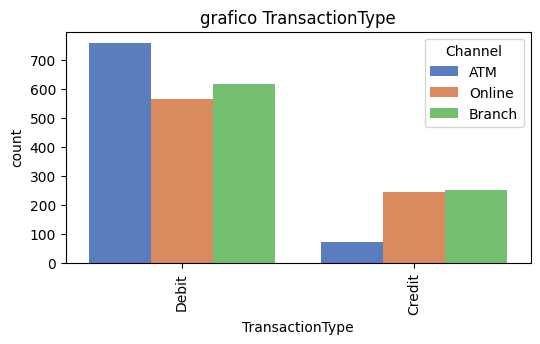

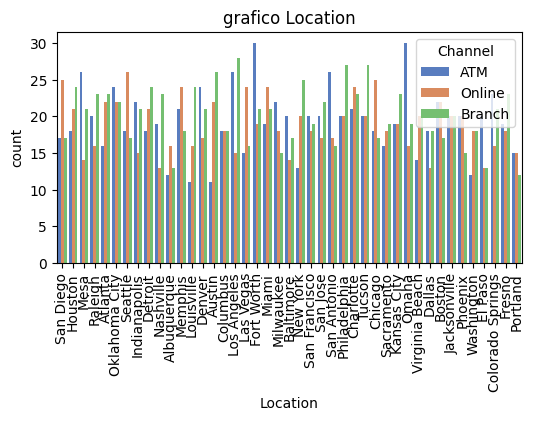

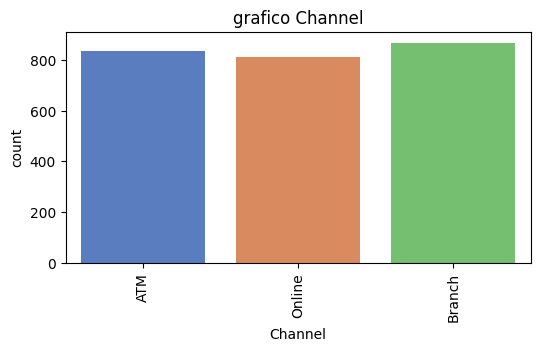

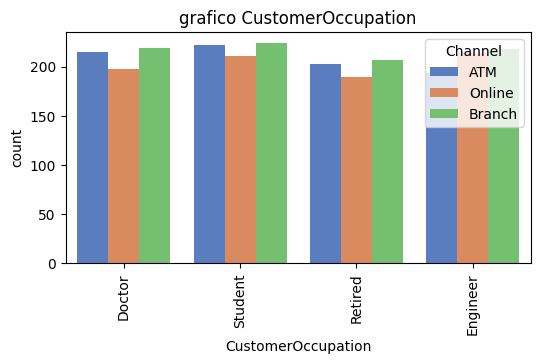

In [16]:
#graficos categoricos 
for i, cat in enumerate(cat_col):
    plt.figure(figsize=(6,3))
    sns.countplot(data=df_1,x=cat, hue='Channel', palette='muted')
    plt.title(f'grafico {cat}')
    plt.xlabel(cat)
    plt.xticks(rotation=90)
    plt.show()
    

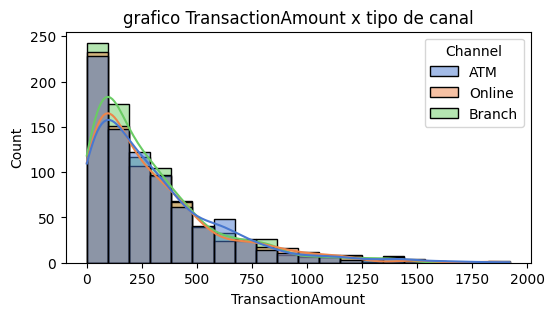

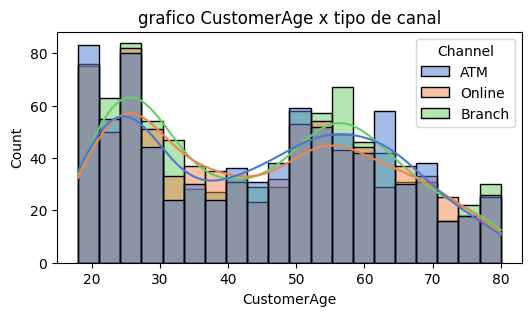

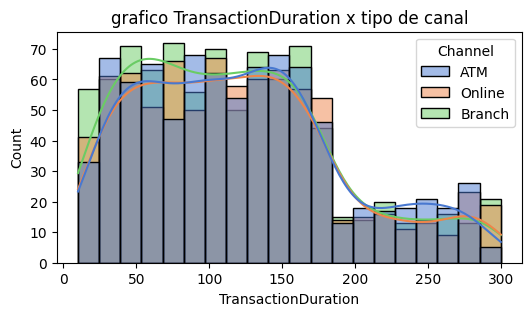

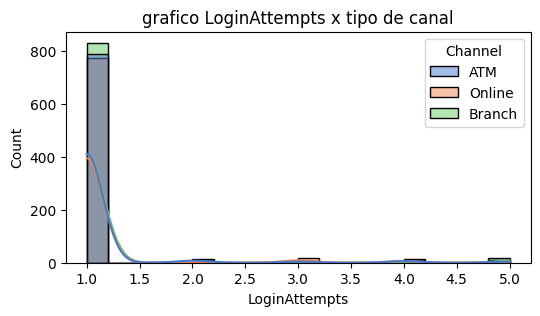

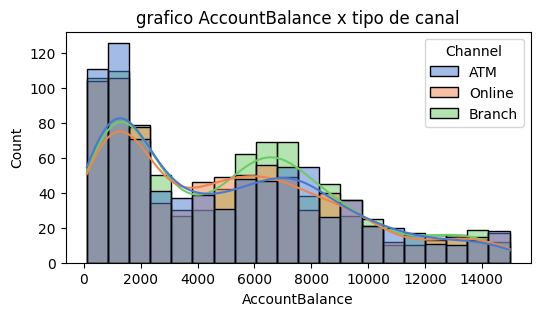

In [17]:
#graficos numericos 
for i, num in enumerate(num_col):
    plt.figure(figsize=(6,3))
    sns.histplot(data=df_1, x=num, hue='Channel', bins=20, palette='muted', kde=True)
    plt.title(f'grafico {num} x tipo de canal')
    plt.xlabel(num)
    plt.show()
    

In [18]:
df_1.columns

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [19]:
#selecionei variaveis especificas para facilitar algumas analises
variables = ['LoginAttempts', 'Location', 'Channel', 'CustomerOccupation'
]

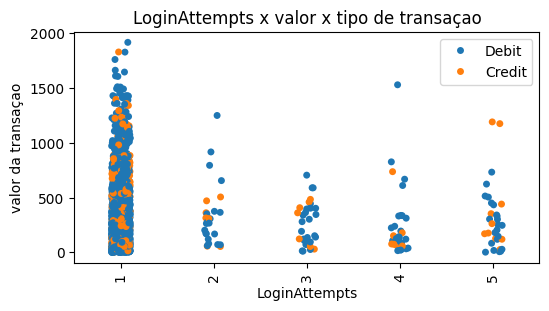

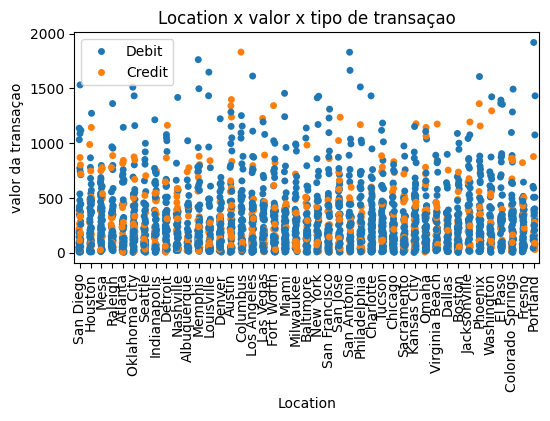

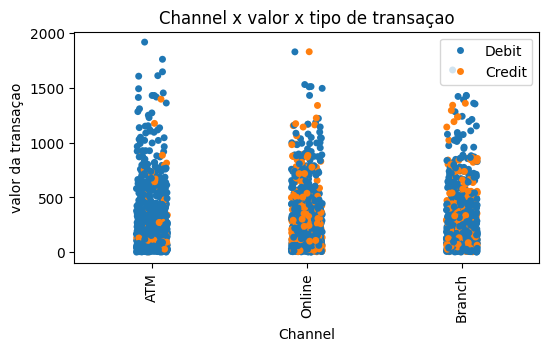

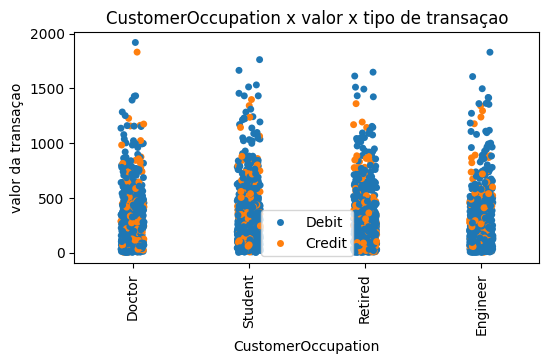

In [20]:
#graf para entender algumas variaveis especificas


for i, plot in enumerate(variables):
    plt.figure(figsize=(6,3))
    sns.stripplot(data=df_1, x=plot,y='TransactionAmount', hue='TransactionType')
    plt.title(f'{plot} x valor x tipo de transaçao')
    plt.xlabel(plot)
    plt.ylabel('valor da transaçao')
    plt.xticks(rotation= 90)
    plt.legend()
    plt.show()

Text(0, 0.5, 'idade')

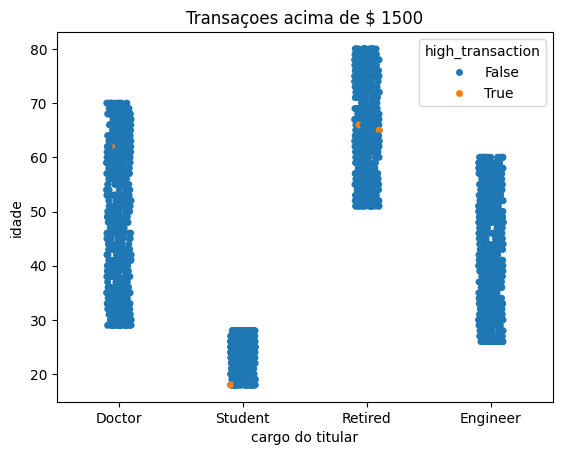

In [32]:
# idade x valor x profisao 
df_1['high_transaction'] = df['TransactionAmount'] > 1500
sns.stripplot(data=df_1, x='CustomerOccupation', y='CustomerAge', hue='high_transaction')
plt.title('Transaçoes acima de $ 1500')
plt.xlabel('cargo do titular')
plt.ylabel('idade')

In [33]:
#por conicidencia, criamos uma coluna high_transaction que vai nos auxiliar futuramente na modelagem 

conclusoes pós EDA:



- estudantes tendem a fazer transaçoes com valores fora da curva? esquisito. 
- A quantidade de tentativa de login tende a levar o usuario a prefirir usar credito? 
- a profissao influenciam no valor da transaçao?


Inferencia 

In [34]:
#teste de hipoteses 
group_1 = df_1['CustomerOccupation']
